In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls "gdrive/My Drive/"

 ApneaData.csv	'Colab Notebooks'   Invoices  'TE Study Material'
 ApneaData.pkl	'Draw IO'	    Study


Data set Link https://drive.google.com/drive/folders/1sRE-iJFwQcOUNFJMUFM-17nH_xUFKoHa?usp=sharing

In [ ]:
import pickle
filename = "gdrive/My Drive/ApneaData.csv"
f = open(filename,'rb')
data = f.read()
f.close()
rows = data.split(b"\n")
print("Dataset contains "+str(len(rows))+ " patients data")
d = []


for row in rows:
    rowSplit = list(map(int,row.split(b" ")))
    d.append(rowSplit)


f = open('gdrive/My Drive/ApneaData.pkl','wb')
pickle.dump(d,f)


f.close()
print("Done")


Dataset contains 16612 patients data
Done


In [ ]:
!ls "gdrive/My Drive"

 ApneaData.csv	'Colab Notebooks'   Invoices  'TE Study Material'
 ApneaData.pkl	'Draw IO'	    Study


In [ ]:
pip install scipy

In [ ]:
 pip install numpy

In [ ]:
import numpy as np
from sklearn import svm,naive_bayes,ensemble,linear_model
from sklearn.metrics import accuracy_score
import time
import pickle

filename = "gdrive/My Drive/ApneaData.pkl"
testPercent=20
features = []
classes = []
t = time.time()


f = open(filename,'rb')
data = pickle.load(f)
f.close()
np.random.shuffle(data)


for row in data:
    features.append(row[:-1])
    classes.append(row[-1])



inputLength = len(features)
print("inputLength is "+str(inputLength))

testLength = int(inputLength*0.2)
print("testLength = "+str(testLength))


train_features, train_classes=features[:-testLength], classes[:-testLength]
test_features,test_classes = features[-testLength:],classes[-testLength:]


print("preprocessing time:",(time.time()-t))
t=time.time()
clf=ensemble.RandomForestClassifier(n_estimators=30)

clf.fit(train_features,train_classes)

print("fitting time:",(time.time()-t))

t=time.time()
pred_classes=[]
for e in test_features:
    pred_classes.append(clf.predict([e])[0])
score = accuracy_score(pred_classes,test_classes)*100
print("predicting time:",(time.time()-t))
print("Accuracy:",score)


inputLength is 16612
testLength = 3322
preprocessing time: 7.219472408294678
fitting time: 30.862091541290283
predicting time: 12.612001419067383
Accuracy: 65.20168573148706


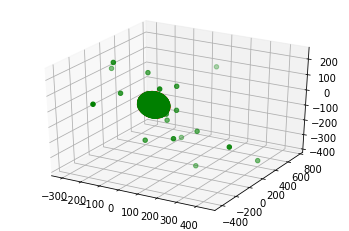

In [ ]:
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

filename = "gdrive/My Drive/ApneaData.pkl"
features = []
classes = []
fig=plt.figure()
ax1=fig.add_subplot(111,projection='3d')
f = open(filename,'rb')
data = pickle.load(f)
f.close()
for row in data:
    features.append(row[:-1])
    classes.append(row[-1])
reduced_features = TSNE(n_components=3).fit_transform(features)
classification = {0:[],1:[]}
colors = ('g','r')
for i in range(len(classes)):
    if classes[i]==0:
        classification[0].append(reduced_features[i])
    else:
        classification[1].append(reduced_features[i])
for i in classification.keys():
    x = []
    y = []
    z = []
    for e in classification[i]:
        x.append(e[0])
        y.append(e[1])
        z.append(e[2])
    ax1.scatter(x,y,z,c=colors[i])
plt.show()

6001


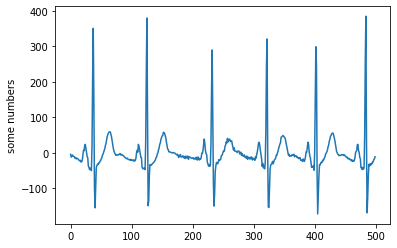

In [ ]:
import matplotlib.pyplot as plt

plt.plot(d[1][:500])
print(len(d[1]))
plt.ylabel('some numbers')
plt.show()

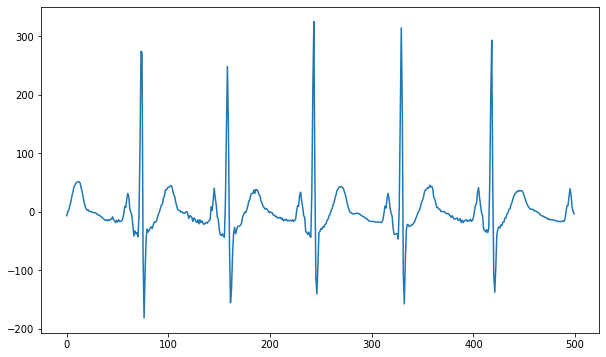

In [ ]:
plt.figure(1, figsize=(10, 6))

plt.plot(d[1][500:1000])


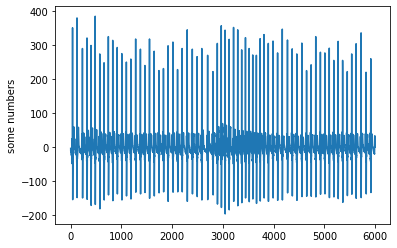

In [ ]:
import matplotlib.pyplot as plt
plt.plot(d[1])
plt.ylabel('some numbers')
plt.show()

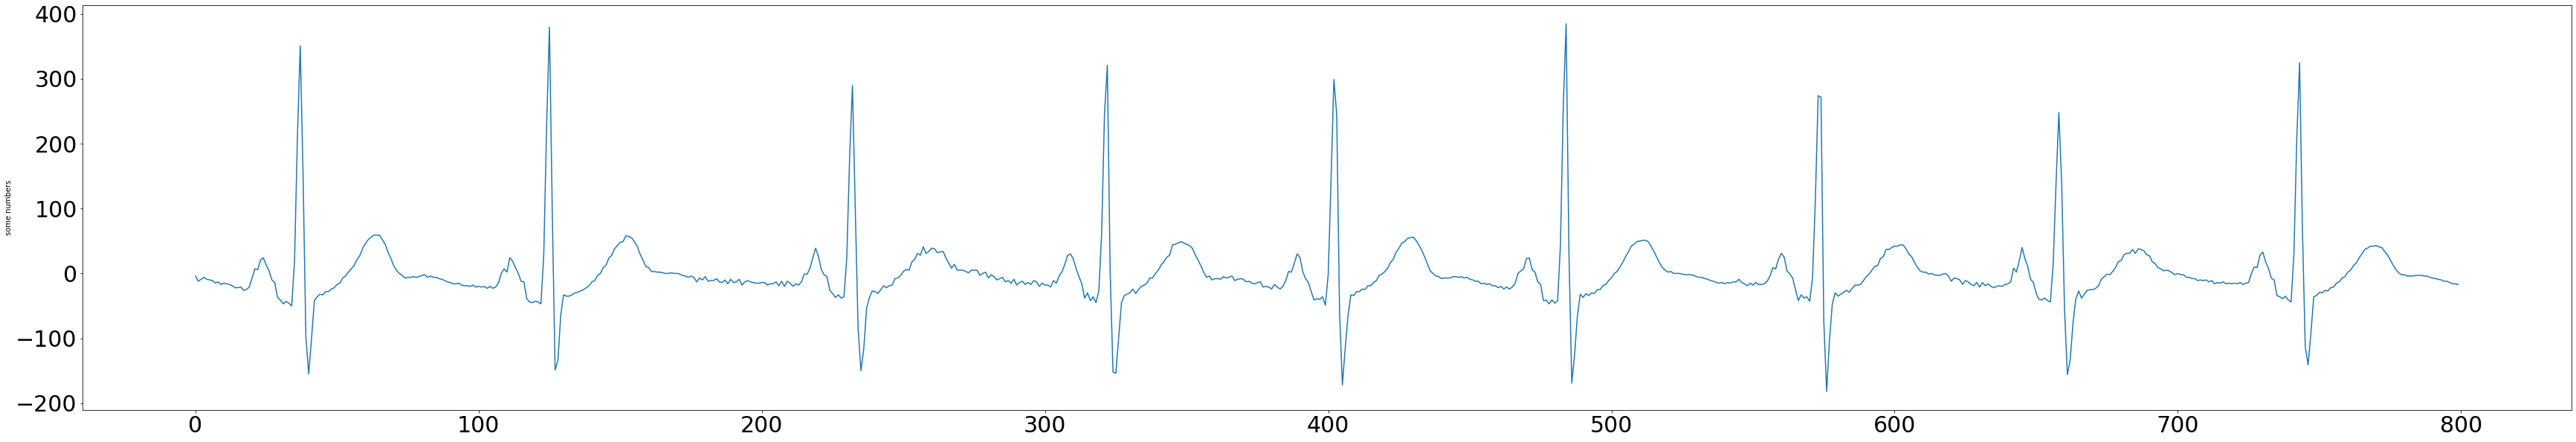

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

plt.figure(1, figsize=(60, 10))

plt.plot(d[1][0:800])
plt.ylabel('some numbers')
plt.show()

In [ ]:

print(data[2][6000])
print(len(train_classes))
print(len(test_classes))
print(13290+3322)

0
9968
6644
16612


In [ ]:
print(len(test_features))

3322


In [ ]:
for e in test_features:
    pred_classes.append(clf.predict([e])[0])

In [ ]:
count =0
num =16612

for i in range (num):
  ss = data[i][:-1]
  mop = clf.predict([ss])[0]
  if mop==data[i][6000]:
    count = count +1
  else:
    count=count

print(count)

print((count/num)*100)


15481
93.19166867324824


In [ ]:
import pickle
filename = "gdrive/My Drive/ApneaData.pkl"
f = open(filename,'rb')
data = pickle.load(f)
f.close()

In [ ]:
reading1 = data[10][:-1]

In [ ]:
print(reading1)

[-5, -15, -4, -10, -6, -1, 13, 9, 13, 25, 25, 22, 28, 35, 32, 33, 34, 35, 32, 25, 23, 18, 10, 11, 6, 2, 6, 6, 6, 1, 1, -6, -1, -4, -1, -6, -8, -7, -18, -10, -5, -17, -13, -12, -14, -16, -14, -16, -14, -18, -23, -9, -23, -21, -18, -21, -22, -13, -18, -16, -17, -13, -17, -16, -17, -11, -4, 11, 12, 38, 37, 24, 8, -4, -4, -35, -28, -40, -29, -40, -27, 43, 194, 289, 57, -98, -132, -94, -38, -29, -23, -25, -19, -22, -14, -16, -9, -10, -3, 0, 4, 6, 15, 17, 25, 28, 35, 38, 41, 43, 43, 41, 40, 36, 31, 25, 19, 12, 8, 5, 1, 3, 2, 2, 3, 3, 2, 3, 2, 0, 0, -1, -3, -3, -3, -4, -6, -9, -10, -7, -8, -9, -10, -11, -11, -11, -11, -13, -13, -11, -13, -13, -14, -14, -16, -14, -15, -16, -16, -17, -15, -16, -17, -17, -18, -19, -13, -5, 10, 8, 25, 25, 20, 0, -7, -8, -29, -40, -40, -38, -41, -47, 14, 189, 333, 155, -98, -131, -71, -30, -30, -29, -31, -26, -26, -23, -23, -19, -14, -10, -7, -1, 1, 7, 12, 19, 24, 32, 36, 41, 42, 48, 48, 46, 40, 38, 27, 23, 12, 11, 9, 2, 0, -1, 1, -2, 0, 4, 0, 0, 0, -5, -1, -3, -6

In [ ]:
testing = data[4][:-1]
mop = clf.predict([testing])[0]
print(mop)

0
